In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from skimage.transform import resize
from pathlib import Path
import numpy as np

# Preprocessing Data

In [4]:
# loading images
dog_directory = Path("images")

breeds = []
for breed in dog_directory.iterdir():
    # count number of images in each breed
    if breed.is_dir():
        breed_count = len(list(breed.glob("*.jpg")))
        breeds.append((breed.name.split("-", 1)[-1], breed_count))

breeds.sort(key=lambda x: x[1], reverse=True)
breeds = [breed[0] for breed in breeds[:10]] # only 10 breeds
# print(breeds)

In [7]:
# load images
X = []
y = []
width, height = 128, 128 # image resolution

for breed in dog_directory.iterdir():
    breed_name = breed.name.split("-", 1)[-1]
    for i, image_path in enumerate(breed.glob("*.jpg")):
        if breed_name not in breeds:
            continue
        image = plt.imread(image_path)
        image = resize(image, (width, height, 3))
        X.append(image.flatten())
        y.append(breeds.index(breed_name))
        if i >= 139:  # do 140 images each
            break
    print(f"Loaded {len(X)} images for {breed_name}")

# test image
X = np.array(X)
y = np.array(y)

print(f"{X=}, {y=}")

Loaded 0 images for silky_terrier
Loaded 140 images for Scottish_deerhound
Loaded 140 images for Chesapeake_Bay_retriever
Loaded 140 images for Ibizan_hound
Loaded 140 images for wire-haired_fox_terrier
Loaded 140 images for Saluki
Loaded 140 images for cocker_spaniel
Loaded 140 images for schipperke
Loaded 140 images for borzoi
Loaded 140 images for Pembroke
Loaded 140 images for komondor
Loaded 140 images for Staffordshire_bullterrier
Loaded 140 images for standard_poodle
Loaded 140 images for Eskimo_dog
Loaded 140 images for English_foxhound
Loaded 140 images for golden_retriever
Loaded 140 images for Sealyham_terrier
Loaded 140 images for Japanese_spaniel
Loaded 140 images for .DS_Store
Loaded 140 images for miniature_schnauzer
Loaded 140 images for malamute
Loaded 140 images for malinois
Loaded 140 images for Pekinese
Loaded 140 images for giant_schnauzer
Loaded 140 images for Mexican_hairless
Loaded 140 images for Doberman
Loaded 140 images for standard_schnauzer
Loaded 140 image

# Splitting data

In [8]:
# Split data into training and test samples
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,   
    test_size = 0.07, random_state=10, shuffle=True
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.07, random_state=10, shuffle=True
)
    
# Check to make sure everything is as expected
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))

X_train:(1209, 49152)
y_train:(1209,)
X_val: 	(92, 49152)
y_val: 	(92,)
X_test: (99, 49152)
y_test: (99,)


# Functions

In [16]:
def normalize(X_train, X_val, X_test):
    X_train = X_train/255
    X_test = X_test/255
    X_val = X_val/255
    return X_train, X_val, X_test

def train_model(c=-1.0, iter=100, kern="linear", d=2, test_img=image):
    t_loss, v_loss = 0, 0

    if kern == "linear":
        if c != -1.0:
            model = svm.SVC(kernel=kern, c=c, decision_function_shape="ovo", probability=True, max_iter=iter)
        else:
            model = svm.SVC(kernel=kern, decision_function_shape="ovo", probability=True, max_iter=iter)
    else:
        model = svm.SVC(kernel="poly", degree=d, decision_function_shape="ovo", probability=True, max_iter=iter)

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    t_loss = 1 - accuracy_score(y_train, y_pred_train)
    y_pred_val = model.predict(X_val)
    v_loss = 1 - accuracy_score(y_val, y_pred_val)
    print(classification_report(y_test, model.predict(X_test)))

    return t_loss, v_loss

# Test

In [14]:
# Iterations
t_loss, v_loss = [], []
for iter in [100, 200]:
    new_t, new_v = train_model(-1.0, iter)
    t_loss.append(new_t)
    v_loss.append(new_v)

# print(t_loss, v_loss)
fig, ax = plt.subplots()
plt.plot(t_loss, label="Training Error")
plt.plot(v_loss, label="Validation Error")
plt.legend(loc="upper left")
ax.set_xticks(np.arange(0, 2))
ax.set_xticklabels(["100", "200"])
plt.title("Error and Number of Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Error")

/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.27      0.44      0.33         9
           1       0.14      0.20      0.17         5
           2       0.43      0.19      0.26        16
           3       0.44      0.40      0.42        10
           4       0.09      0.14      0.11         7
           5       0.27      0.50      0.35         6
           6       0.33      0.23      0.27        13
           7       0.12      0.12      0.12         8
           8       0.20      0.18      0.19        11
           9       0.17      0.14      0.15        14

    accuracy                           0.24        99
   macro avg       0.25      0.26      0.24        99
weighted avg       0.27      0.24      0.24        99



/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
# Test

/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.27      0.44      0.33         9
           1       0.14      0.20      0.17         5
           2       0.43      0.19      0.26        16
           3       0.44      0.40      0.42        10
           4       0.09      0.14      0.11         7
           5       0.27      0.50      0.35         6
           6       0.33      0.23      0.27        13
           7       0.12      0.12      0.12         8
           8       0.20      0.18      0.19        11
           9       0.17      0.14      0.15        14

    accuracy                           0.24        99
   macro avg       0.25      0.26      0.24        99
weighted avg       0.27      0.24      0.24        99

[0.14888337468982626] [0.7282608695652174]


/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.33      0.29         9
           1       0.00      0.00      0.00         5
           2       0.46      0.38      0.41        16
           3       0.71      0.50      0.59        10
           4       0.09      0.14      0.11         7
           5       0.38      0.50      0.43         6
           6       0.17      0.08      0.11        13
           7       0.09      0.12      0.11         8
           8       0.18      0.18      0.18        11
           9       0.38      0.36      0.37        14

    accuracy                           0.27        99
   macro avg       0.27      0.26      0.26        99
weighted avg       0.30      0.27      0.28        99



/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.22      0.22         9
           1       0.00      0.00      0.00         5
           2       0.40      0.38      0.39        16
           3       0.62      0.50      0.56        10
           4       0.07      0.14      0.10         7
           5       0.29      0.33      0.31         6
           6       0.29      0.31      0.30        13
           7       0.17      0.12      0.14         8
           8       0.25      0.27      0.26        11
           9       0.40      0.29      0.33        14

    accuracy                           0.28        99
   macro avg       0.27      0.26      0.26        99
weighted avg       0.31      0.28      0.29        99



/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.22      0.24         9
           1       0.17      0.20      0.18         5
           2       0.50      0.38      0.43        16
           3       0.50      0.10      0.17        10
           4       0.08      0.14      0.10         7
           5       0.17      0.33      0.22         6
           6       0.29      0.15      0.20        13
           7       0.14      0.25      0.18         8
           8       0.22      0.36      0.28        11
           9       0.57      0.29      0.38        14

    accuracy                           0.25        99
   macro avg       0.29      0.24      0.24        99
weighted avg       0.33      0.25      0.26        99



/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rileydou/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification

              precision    recall  f1-score   support

           0       0.14      0.11      0.12         9
           1       0.33      0.20      0.25         5
           2       0.29      0.38      0.32        16
           3       0.00      0.00      0.00        10
           4       0.10      0.14      0.12         7
           5       0.29      0.33      0.31         6
           6       0.33      0.23      0.27        13
           7       0.00      0.00      0.00         8
           8       0.28      0.45      0.34        11
           9       0.38      0.36      0.37        14

    accuracy                           0.24        99
   macro avg       0.21      0.22      0.21        99
weighted avg       0.23      0.24      0.23        99

[0.14888337468982626, 0.13482216708023165, 0.1364764267990074, 0.13813068651778326, 0.2638544251447478] [0.7282608695652174, 0.7065217391304348, 0.7065217391304348, 0.7282608695652174, 0.7934782608695652]


Text(0.5, 0, 'Degree')

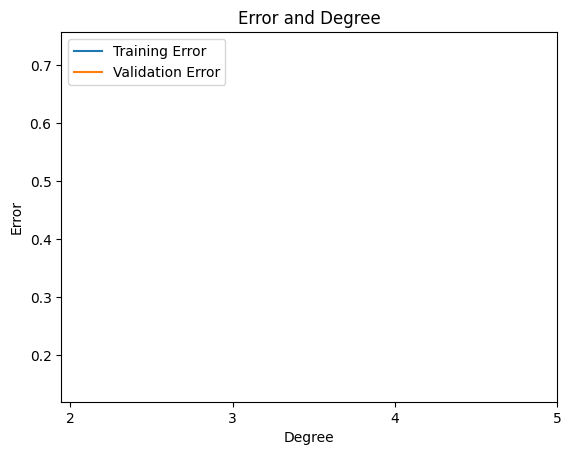

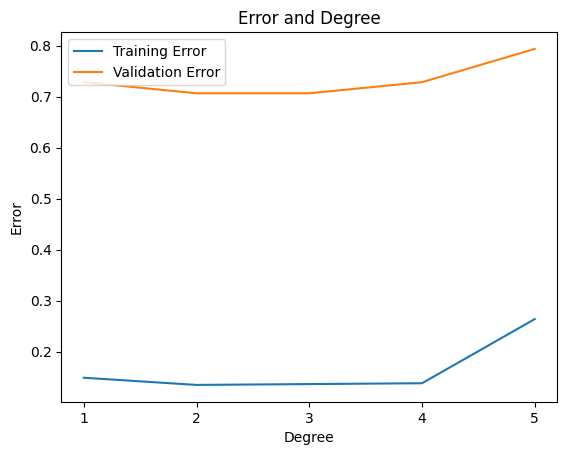

In [9]:
# Polynomial kernel (degree)
t_d_loss, v_d_loss = [], []

t_d_loss, v_d_loss = train_model()

for d in [2, 3, 4, 5]:
    new_t, new_v = train_model(c=-1.0, kern="poly", iter=100, deg=d)
    t_d_loss.append(new_t)
    v_d_loss.append(new_v)
    
fig, ax = plt.subplots()
plt.plot(t_d_loss, label="Training Error")
plt.plot(v_d_loss, label="Validation Error")
plt.legend(loc="upper left")
ax.set_xticks(np.arange(0, 5))
ax.set_xticklabels(["1", "2", "3", "4", "5"])
plt.title("Error and Degree")
plt.ylabel("Error")
plt.xlabel("Degree")


              precision    recall  f1-score   support

           0       0.27      0.33      0.30         9
           1       0.07      0.20      0.10         5
           2       0.60      0.19      0.29        16
           3       0.67      0.40      0.50        10
           4       0.08      0.14      0.11         7
           5       0.20      0.33      0.25         6
           6       0.31      0.31      0.31        13
           7       0.22      0.25      0.24         8
           8       0.20      0.18      0.19        11
           9       0.38      0.21      0.27        14

    accuracy                           0.25        99
   macro avg       0.30      0.26      0.25        99
weighted avg       0.34      0.25      0.27        99

              precision    recall  f1-score   support

           0       0.31      0.56      0.40         9
           1       0.11      0.20      0.14         5
           2       0.40      0.25      0.31        16
           3       0.50 

Text(0.5, 0, 'Lamba')

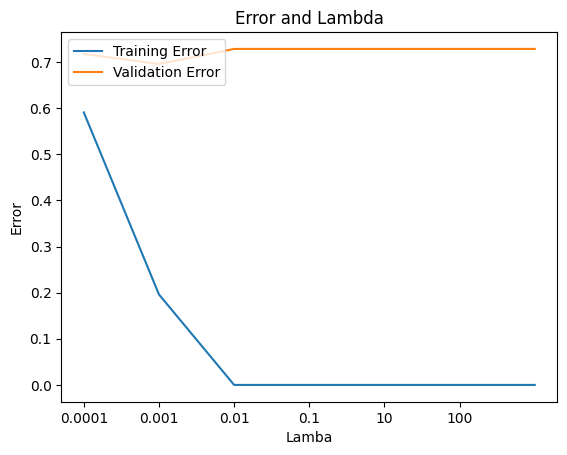

In [28]:
t_r_loss = []
v_r_loss = []
for c in [0.0001, 0.001]:
    new_t, new_v = train_model(c)
    t_r_loss.append(new_t)
    v_r_loss.append(new_v)

fig, ax = plt.subplots()
plt.plot(t_r_loss, label="Training Error")
plt.plot(v_r_loss, label="Validation Error")
plt.legend(loc="upper left")
ax.set_xticks(np.arange(0, 6))
ax.set_xticklabels(["0.0001", "0.001", "0.01", "0.1", "10", "100"])
plt.title("Error and Lambda")
plt.ylabel("Error")
plt.xlabel("Lamba")

              precision    recall  f1-score   support

           0       0.18      0.22      0.20         9
           1       0.00      0.00      0.00         5
           2       0.33      0.25      0.29        16
           3       0.50      0.40      0.44        10
           4       0.00      0.00      0.00         7
           5       0.22      0.33      0.27         6
           6       0.43      0.23      0.30        13
           7       0.18      0.25      0.21         8
           8       0.20      0.18      0.19        11
           9       0.30      0.21      0.25        14

    accuracy                           0.22        99
   macro avg       0.23      0.21      0.21        99
weighted avg       0.27      0.22      0.24        99

              precision    recall  f1-score   support

           0       0.18      0.22      0.20         9
           1       0.00      0.00      0.00         5
           2       0.33      0.25      0.29        16
           3       0.50 

Text(0.5, 0, 'Normalized?')

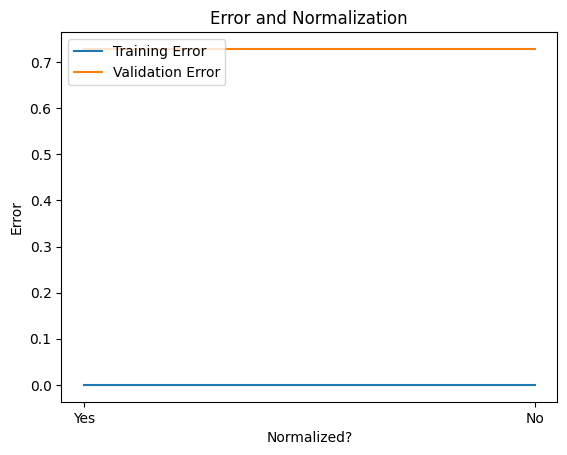

In [8]:
t_n_loss = []
v_n_loss = []
for t, v, test in [(X_train, X_val, X_test), normalize(X_train, X_val, X_test)]:
    model = svm.SVC(kernel="linear", decision_function_shape="ovo", probability=True)
    model.fit(t, y_train)
    y_pred_train = model.predict(t)
    t_n_loss.append(1 - accuracy_score(y_train, y_pred_train))
    y_pred_val = model.predict(v)
    v_n_loss.append(1 - accuracy_score(y_val, y_pred_val))
    print(classification_report(y_test, model.predict(test)))

fig, ax = plt.subplots()
plt.plot(t_n_loss, label="Training Error")
plt.plot(v_n_loss, label="Validation Error")
plt.legend(loc="upper left")
ax.set_xticks(np.arange(0, 2))
ax.set_xticklabels(["Yes", "No"])
plt.title("Error and Normalization")
plt.ylabel("Error")
plt.xlabel("Normalized?")